# On commance par l'importation de bibliotheques


In [4]:
import pandas as pd 

from sklearn.preprocessing import LabelEncoder

import seaborn as sns

import matplotlib.pyplot as plt


# Apres , on import notre data

In [5]:
df=pd.read_csv('car_prediction_data.csv')

# On voit un aperçue

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# On voit s'il ya des variables manquantes

In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# On procede a la visualisation

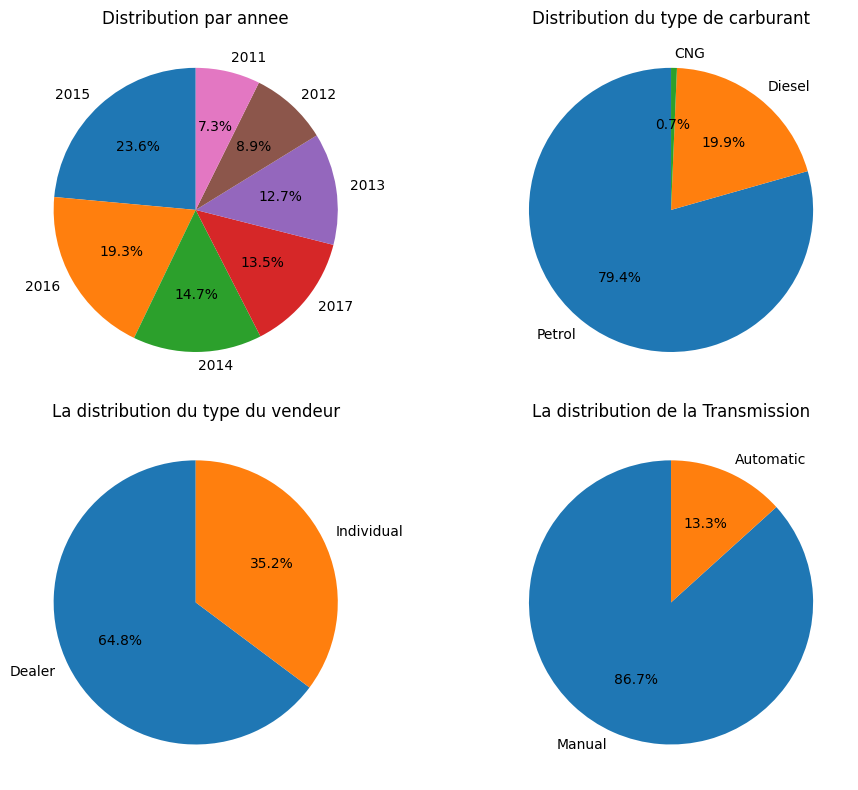

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
year_counts = df['Year'].value_counts().head(7)
axes[0, 0].pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution par annee')

fuel_type_counts = df['Fuel_Type'].value_counts()
axes[0, 1].pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Distribution du type de carburant')

seller_type_counts = df['Seller_Type'].value_counts()
axes[1, 0].pie(seller_type_counts, labels=seller_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('La distribution du type du vendeur')

transmission_counts = df['Transmission'].value_counts()
axes[1, 1].pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('La distribution de la Transmission')

plt.tight_layout()

plt.show()

* Dans la distribution d'annes j'ai selectionner le top 10

# Cette fois on va visualiser le prix de vente,le prix present et le kilometrage conduit

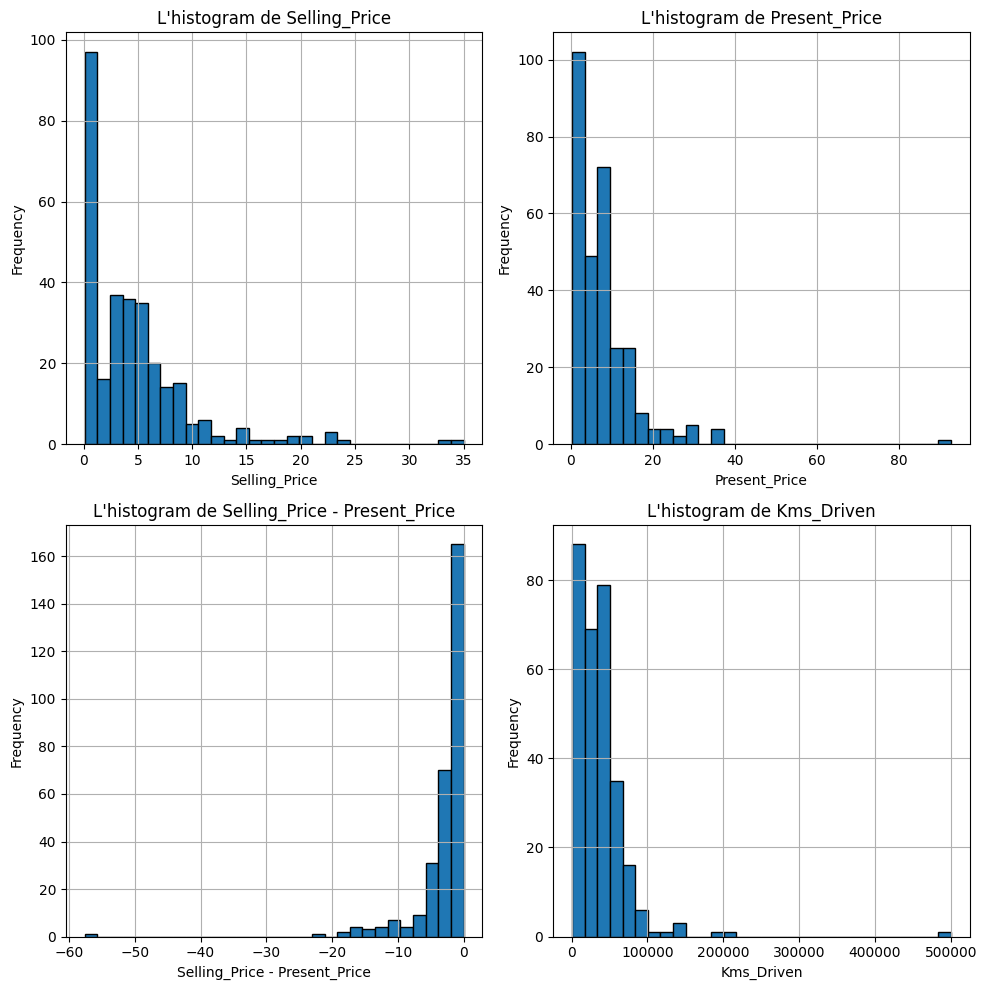

In [14]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.hist(df['Selling_Price'], bins=30, edgecolor='black')
plt.title("L'histogram de Selling_Price")
plt.xlabel('Selling_Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.hist(df['Present_Price'], bins=30, edgecolor='black')
plt.title("L'histogram de Present_Price")
plt.xlabel('Present_Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.hist(df['Selling_Price'] - df['Present_Price'], bins=30, edgecolor='black')
plt.title("L'histogram de Selling_Price - Present_Price")
plt.xlabel('Selling_Price - Present_Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(df['Kms_Driven'], bins=30, edgecolor='black')
plt.title("L'histogram de Kms_Driven")
plt.xlabel('Kms_Driven')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()

plt.show()

# Maintenant on va wrangler notre dataset

In [9]:
def wrangle(df):
    df_copy = df.copy()
    categorical_columns = ['Fuel_Type', 'Seller_Type', 'Transmission']
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        df_copy[column] = label_encoder.fit_transform(df_copy[column])
    df_copy = df_copy.drop('Car_Name', axis=1)
    return df_copy



In [15]:
df_w=wrangle(df)
df_w.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


# La correlation heatmap

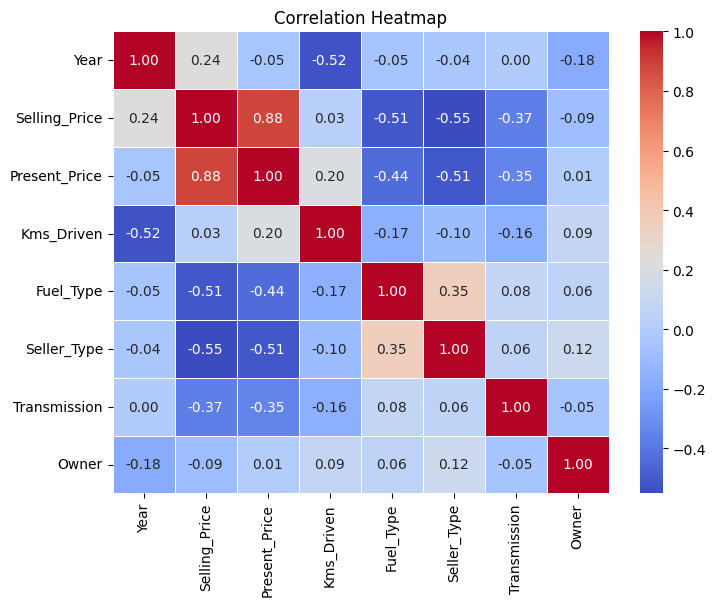

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_w.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# Le lien du dataset
https://www.kaggle.com/datasets/bhavikjikadara/car-price-prediction-dataset